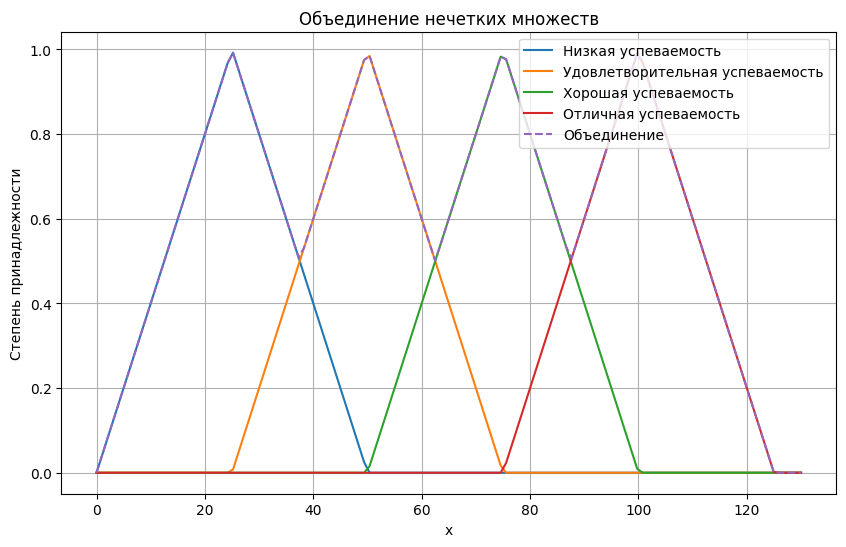

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class TriangularFuzzySet:
    def __init__(self, name, a, b, c):
        self.name = name  # название множества
        self.a = a  # левая вершина
        self.b = b  # вершина (максимум)
        self.c = c  # правая вершина

    def membership_degree(self, x):
        """Вычисление степени принадлежности для треугольной функции."""
        if x < self.a or x > self.c:
            return 0
        elif self.a <= x < self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b <= x < self.c:
            return (self.c - x) / (self.c - self.b)
        else:
            return 1

    def plot(self, x_values):
        """Построение графика треугольной функции."""
        y_values = [self.membership_degree(x) for x in x_values]
        plt.plot(x_values, y_values, label=self.name)

def fuzzy_union(sets, x_values):
    """Объединение множества нечетких множеств."""
    union_values = []
    for x in x_values:
        max_degree = max(set.membership_degree(x) for set in sets)
        union_values.append(max_degree)  # объединение - максимум
    return union_values

def plot_fuzzy_union(sets, x_values):
    """Построение графика для объединения нечетких множеств."""
    plt.figure(figsize=(10, 6))
    
    # Построить графики отдельных множеств
    for fuzzy_set in sets:
        fuzzy_set.plot(x_values)
    
    # Получение и построение объединенного множества
    union_values = fuzzy_union(sets, x_values)
    plt.plot(x_values, union_values, label='Объединение', linestyle='--')

    plt.title('Объединение нечетких множеств')
    plt.xlabel('x')
    plt.ylabel('Степень принадлежности')
    plt.legend()
    plt.grid()
    plt.show()

# Задаем нечеткие множества
low_performance = TriangularFuzzySet('Низкая успеваемость', 0, 25, 50)
average_performance = TriangularFuzzySet('Удовлетворительная успеваемость', 25, 50, 75)
high_performance = TriangularFuzzySet('Хорошая успеваемость', 50, 75, 100)
excellent_performance = TriangularFuzzySet('Отличная успеваемость',75, 100, 125)  # Новое множество

# Определяем диапазон значений
x_values = np.linspace(0, 130, 130)

# Плотим объединение множеств
plot_fuzzy_union([low_performance, average_performance, high_performance, excellent_performance], x_values)
